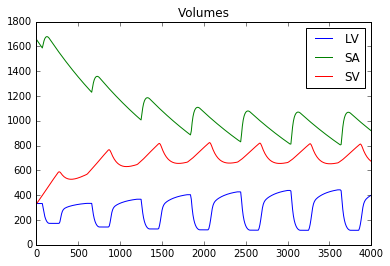

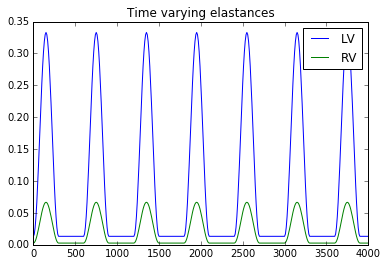

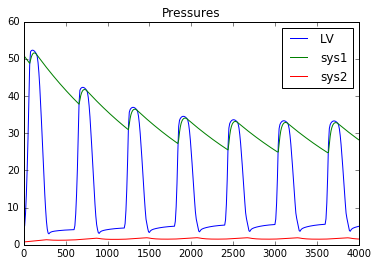

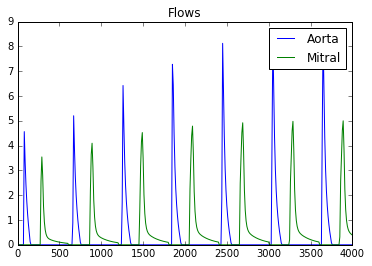

In [2]:
%matplotlib inline

import circ_no_atria as circ
from scipy.integrate import odeint
import numpy as np 
import matplotlib.pyplot as plt

t = np.linspace(0,4000,401)
init = circ.init_state_values()
params = circ.init_parameter_values()
#params = circ.init_parameter_values(Rao_s=50)
params = circ.init_parameter_values(R1_s=50)

pressure_inds = circ.monitor_indices('plv','p1s','p2s')
flow_inds = circ.monitor_indices('qart_s','q_mit')#,'q1_s')
E_inds = circ.monitor_indices('Elv','Erv')


s = odeint(circ.rhs,init,t,(params,))

#plot volumes
plt.plot(t,s[:,0],t,s[:,2],t,s[:,3])
plt.legend(['LV','SA','SV'])
plt.title('Volumes')

#compute pressures and flows
pressures = np.zeros((t.shape[0],len(pressure_inds)))
flows = np.zeros((t.shape[0],len(flow_inds)))
E = np.zeros((t.shape[0],len(E_inds)))
for i in range(t.shape[0]):
        m = circ.monitor(s[i],t[i],params)
        pressures[i,:] = m[pressure_inds]
        flows[i,:] =m[flow_inds]
	E[i] = m[E_inds]
	

#plot time varying elastance
plt.figure()
plt.plot(t,E[:,0],t,E[:,1])
plt.title('Time varying elastances')
plt.legend(['LV','RV'])

#plot pressures
plt.figure()
plt.plot(t,pressures[:,0],t,pressures[:,1],t,pressures[:,2])
plt.title('Pressures')
plt.legend(['LV','sys1','sys2'])

#plot flows
plt.figure()
plt.plot(t,flows[:,0],t,flows[:,1])#,t,flows[:,2])
plt.title('Flows')
plt.legend(['Aorta','Mitral'])

plt.show()
